>> Amr Abdelaziz Attia Mohamed    7447

## Binary Classification

import some of the necessary libraries

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Read the CSV file

In [52]:
# Load a dataset from a CSV file
df = pd.read_csv('heart_disease_health_indicators.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


Divide the file to (X) and (Y) and print the head of each and its dimention

In [53]:
# split data to x and y 
x=df.iloc[:,1:]
y=df.iloc[:,0]
# printing the head and dimension of (x)
print(x.head())
print(x.shape)
# printing the head and dimension of (y)
print(y.head())
print(y.shape)
y.value_counts()


   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0       1         1          1   40       1       0         0             0   
1       0         0          0   25       1       0         0             1   
2       1         1          1   28       0       0         0             0   
3       1         0          1   27       0       0         0             1   
4       1         1          1   24       0       0         0             1   

   Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0       0        1  ...              1            0        5        18   
1       0        0  ...              0            1        3         0   
2       1        0  ...              1            1        5        30   
3       1        1  ...              1            0        2         0   
4       1        1  ...              1            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        15         1    0 

0    229773
1     23888
Name: HeartDiseaseorAttack, dtype: int64

Normalize the (X) of the data

In [54]:
# Normalize x (Standardize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 1.15371459,  1.16527275,  0.19692922, ...,  0.31687658,
        -1.06568342, -1.47465258],
       [-0.86676549, -0.85816818, -5.07796657, ..., -0.33796003,
         0.96329885, -2.44035478],
       [ 1.15371459,  1.16527275,  0.19692922, ...,  0.31687658,
        -1.06568342,  0.93960291],
       ...,
       [-0.86676549, -0.85816818, -5.07796657, ..., -1.64763325,
         0.96329885, -0.50895039],
       [-0.86676549,  1.16527275,  0.19692922, ..., -0.66537834,
        -1.06568342, -2.44035478],
       [-0.86676549,  1.16527275,  0.19692922, ..., -0.33796003,
        -1.06568342, -1.47465258]])

Divide the data to train and test with ratio 80% train & 20% test with respect to the count of y in each split

In [55]:
# divide the data to train and test with respect to the count of y (HeartDiseaseorAttack)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)
print("Count of y_train:")
print(y_train.value_counts())
print("\nCount of y_test:")
print(y_test.value_counts())
# x_test.shape

Count of y_train:
0    183818
1     19110
Name: HeartDiseaseorAttack, dtype: int64

Count of y_test:
0    45955
1     4778
Name: HeartDiseaseorAttack, dtype: int64


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras import regularizers

Making the main model with 2 layers and BatchNormalization after each one and 1 layer for the output 

Making dropout after first BatchNormalization

In [57]:
# # Difine the model
# model=Sequential()
# # x_train.shape[1] =21
# # make hidden layer with neuron size (64) and input x_train dimension
# model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
# # # Hidden layer 1 with L1 and L2 regularization
# # model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],),
# #                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
# # make hidden layer with neurons size (32) and input the first hidden layer (64)
# model.add(Dense(32,activation='relu'))
# # # Hidden layer 2 with L1 and L2 regularization
# # model.add(Dense(32, activation='relu',
# #                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
# # model.add(Dense(16,activation='relu'))
# # make output layer of size (1) and input the second hidden layer (32)
# model.add(Dense(1,activation='sigmoid')) # binary classification
# model.summary()




model = Sequential()

# First Dense layer with Batch Normalization
model.add(Dense(128, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second Dense layer with Batch Normalization
model.add(Dense(64, activation='sigmoid'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(32, activation='sigmoid'))
# model.add(BatchNormalization())

# model.add(Dense(16, activation='sigmoid'))
# model.add(BatchNormalization())

# Output layer (no Batch Normalization needed here)
model.add(Dense(1, activation='sigmoid'))  # binary classification

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2816      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                

Compile the model with optimizer "adam" and loss "binary crossentropy" 

In [58]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# train the model and visualize loss 
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2548 - accuracy: 0.9027 - val_loss: 0.2401 - val_accuracy: 0.9061
Epoch 2/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2430 - accuracy: 0.9069 - val_loss: 0.2391 - val_accuracy: 0.9074
Epoch 3/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2423 - accuracy: 0.9069 - val_loss: 0.2409 - val_accuracy: 0.9062
Epoch 4/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2415 - accuracy: 0.9074 - val_loss: 0.2383 - val_accuracy: 0.9078
Epoch 5/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2404 - accuracy: 0.9075 - val_loss: 0.2384 - val_accuracy: 0.9080
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2405 - accuracy: 0.9075 - val_loss: 0.2373 - val_accuracy: 0.9080
Epoch 7/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2403 - accuracy: 0.9073 - val_loss: 0.2384 - val_ac

View the final loss and accuracy of the model 

In [59]:
test_loss ,test_accuracy = model.evaluate(x_test,y_test)
test_accuracy

1586/1586 [==============================] - 2s 1ms/step - loss: 0.2374 - accuracy: 0.9081


0.9081071615219116

- Making threshold of (0.5) to pridect the final output

- Printing the accuracy of the model 

- Printing the confusion matrix of the model

- Printing the Precision, Recall, F1-Score

- Printing the  Receiver Operating Characteristic(ROC) of the model 

- Plotting the graph of the ROC

Precision, Recall, and F1-Score Rules

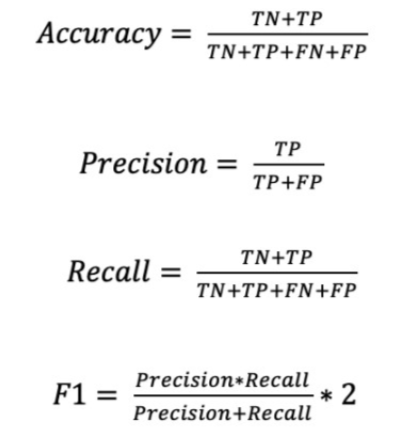

ROC Rule

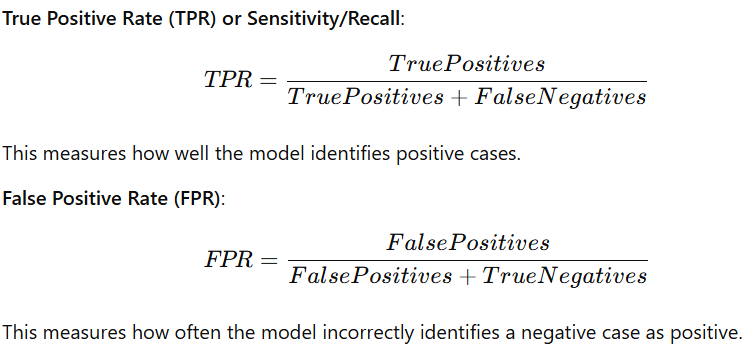

1586/1586 [==============================] - 2s 1ms/step

Accuracy: 90.81%



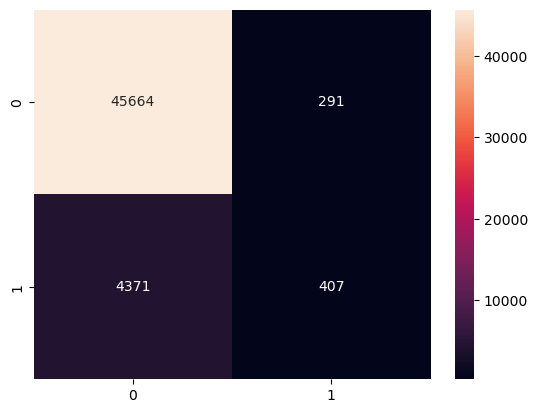

Precision: 0.58
Recall: 0.09
F1-Score: 0.15

ROC-AUC: 0.85


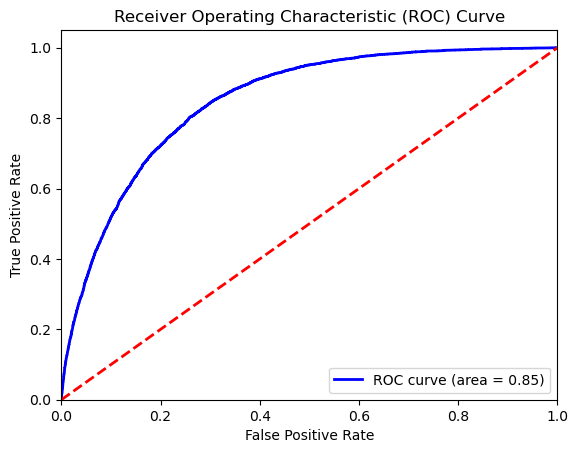

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# printing the accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%\n")

# plot confusion_matrix using seaborn
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.savefig('confusion_matrix.png')
plt.show()

# # plot confusion_matrix using ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC: {roc_auc:.2f}")

# Step 4: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()


- Plotting the Loss of training VS validation

- Plotting the accuracy of training VS validation

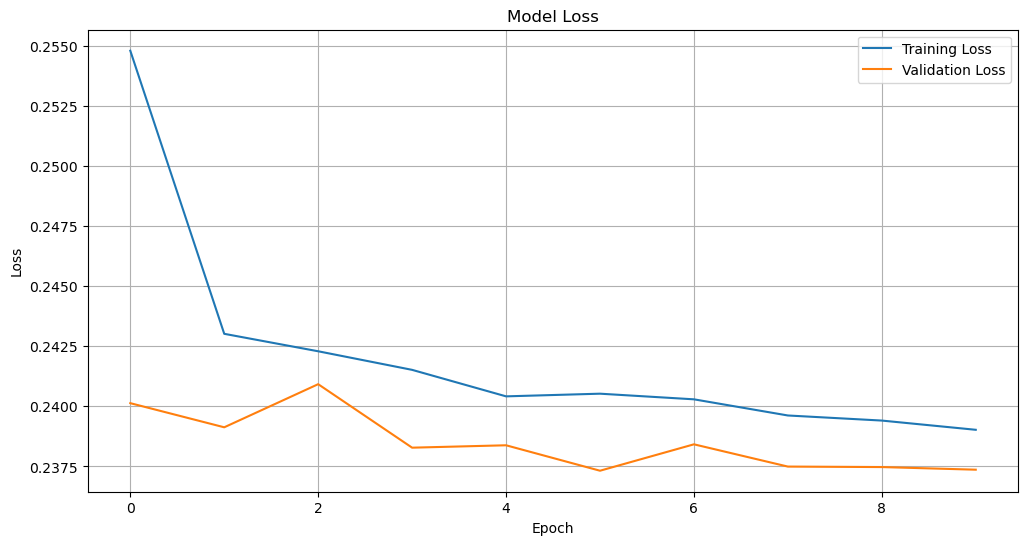

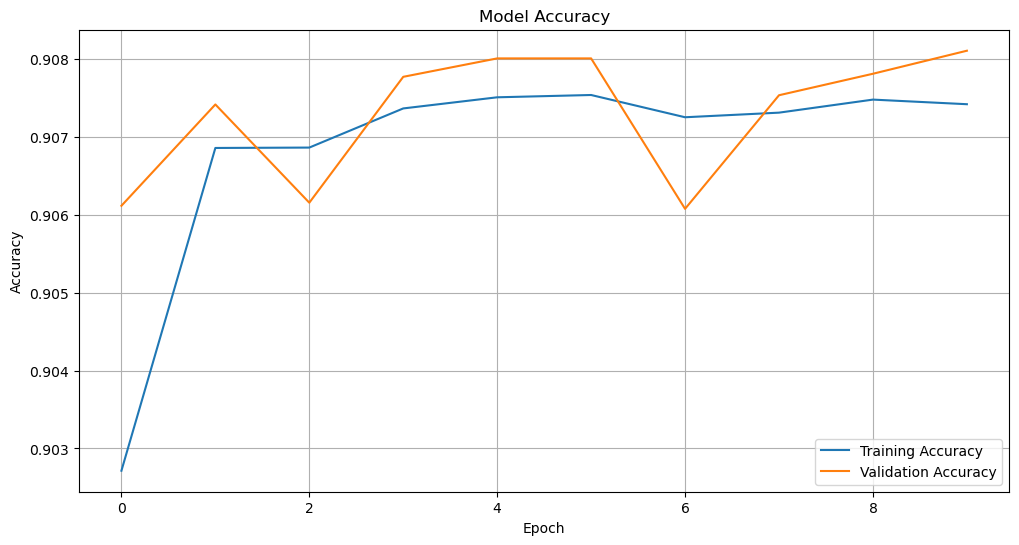

In [61]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('model_loss.png')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('model_accuracy.png')
plt.show()

- Make tensorBoard 

- Early stopping callback

- Reduce learning rate on plateau

- Model train

In [62]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,TensorBoard
import os
import time

# Create a directory for TensorBoard logs with a unique timestamp-based subdirectory
log_dir = os.path.join("logs", "fit", "model_" + str(int(time.time())))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define early stopping and reduce learning rate callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Fit (train) the model on the training data with the specified parameters
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_data=(x_test, y_test),
          callbacks=[early_stopping, reduce_lr, tensorboard_callback])  




Epoch 1/100
6342/6342 [==============================] - 20s 3ms/step - loss: 0.2389 - accuracy: 0.9075 - val_loss: 0.2386 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 2/100
6342/6342 [==============================] - 20s 3ms/step - loss: 0.2389 - accuracy: 0.9074 - val_loss: 0.2380 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 3/100
6342/6342 [==============================] - 16s 2ms/step - loss: 0.2388 - accuracy: 0.9077 - val_loss: 0.2379 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 4/100
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2383 - accuracy: 0.9078 - val_loss: 0.2372 - val_accuracy: 0.9080 - lr: 0.0010
Epoch 5/100
6342/6342 [==============================] - 16s 3ms/step - loss: 0.2384 - accuracy: 0.9077 - val_loss: 0.2377 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 6/100
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2384 - accuracy: 0.9078 - val_loss: 0.2375 - val_accuracy: 0.9082 - lr: 0.0010
Epoch 7/100
6342/6342 [=======================

## Bonus (Tuning)



- Tuning on the neuron count and the optimizer type

- Neuron count: We increase each time (16) neurons

- Optimizer type: We try 2 optimizers (adam, rmsprop)

Making gridsearch to try all the neuron counts with all optimizer types to get the best model

In [67]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=16, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use GridSearch to try all combinations
tuner = kt.GridSearch(build_model, objective='val_accuracy', max_trials=None, executions_per_trial=1)

# Perform the search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Retrieve the best model and its summary
best_model = tuner.get_best_models()[0]
best_model.summary()

Reloading Tuner from .\untitled_project\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Printing the accuracy of the best model

In [68]:
y_pred_prob = best_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# printing the accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%\n")


1586/1586 [==============================] - 1s 899us/step

Accuracy: 90.84%

